DataFrame[measuredAt: string, lastCalibrationDate: string, equipmentNumber: string, P_x_.Hou_OperatingCPCPump: string, P_x_.Hou_OperatingLastService: string, P_x_.Hou_OperatingRD: string, P_x_.Hou_OperatingRDPump: string, P_x_.Hou_OperatingTotal: string, P_x_.t_TemperaturePND1Set: string, P_x_.t_TemperatureSampleLineSet: string, P_x_.t_TemperatureVPRSet: string, P_x_CPCInletPressureLimit: string, P_x_PND1RelativePressure: string, P_x_PressureAbsolute: string, P_x_RDHeatingSwitch: string, P_x_VPRHeatingSwitch: string, P_x_mn_PNDBypassFlowMin: string, P_x_mx_SystemPressureMax: string, Y_c_DeviceName: string, Y_c_FirmwareVersion: string, Y_r_ChannelFlowCheckResult: string, Y_r_LeakCheckResult: string, Y_r_ResponseCheckResult: string, Y_y_.Hou_NextService: string, Y_y_.U_Voltage1AnalogControllerBoard: string, Y_y_.U_Voltage1AnalogInterfaceBoard: string, Y_y_.U_Voltage1ControllerBoard: string, Y_y_.U_Voltage2AnalogControllerBoard: string, Y_y_.U_Voltage2AnalogInterfaceBoard: string, Y_y_.U_

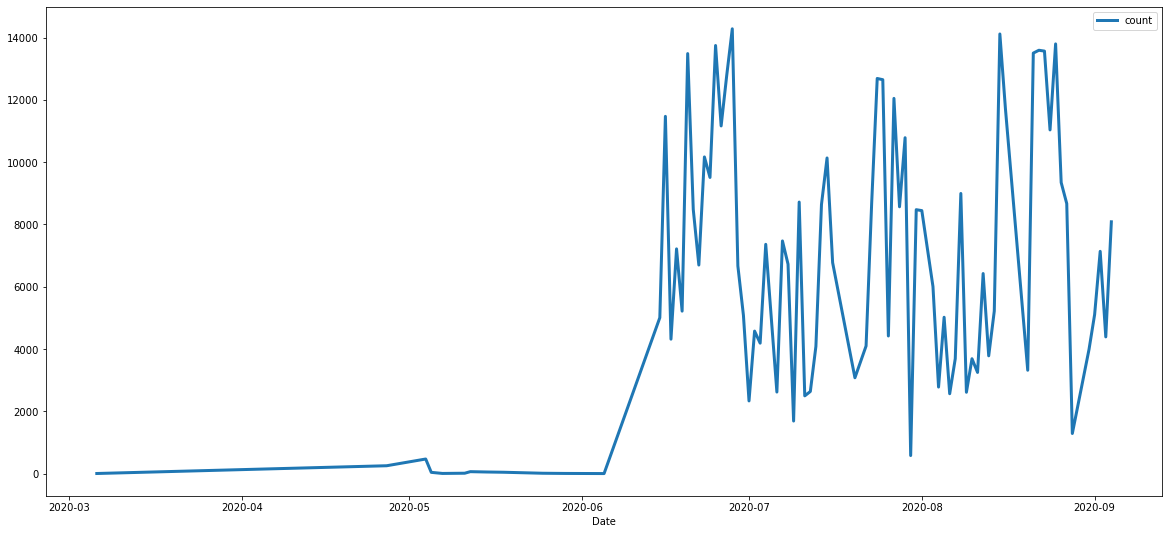

In [1]:
from pathlib import Path
import os
import pandas as pd

# Initiate findspark instance to run pyspark 
import findspark
findspark.init()

# Importing PySpark
import pyspark 

# Create a spark session 
from pyspark.sql import SparkSession
from pyspark.sql.functions import split, explode
from pyspark.sql.functions import *
spark = SparkSession.builder.getOrCreate()

final_489 = spark.read.parquet(r'D:\Device_anomaly_new\error_data\APC_Error')
display(final_489)

final_489_f = final_489.filter(final_489.Z_y_Error.isNotNull())
final_489_ff=final_489_f.filter(final_489.Z_y_Error!='null')
final_489_date = final_489_ff.withColumn("Date", date_format("measuredAt", "yyyy-MM-dd"))

df_year = final_489_date.withColumn('year',date_format(col("Date"), "Y"))
df_year = df_year.withColumn('month',date_format(col("Date"), "M"))
df_year = df_year.withColumn('day',date_format(col("Date"), "d"))

splitted_df=df_year.withColumn('errors',explode(split('Z_y_Error','\|')))
equipment_1=df_year.filter(splitted_df.equipmentNumber == '000000000001751400')
equipment_1=splitted_df.filter(splitted_df.equipmentNumber == '000000000001751400')
spark.conf.set("spark.sql.execution.arrow.enabled", "true")

#equipment_1_df = equipment_1.toPandas()

equipment_1_date_count=equipment_1.groupBy('Date','errors').count()

equipment_1_date_count1=equipment_1_date_count.toPandas()
equipment_1_date_count1['Date'] = pd.to_datetime(equipment_1_date_count1['Date']).dt.date

equipment_1_date_count1_11040 = equipment_1_date_count1[equipment_1_date_count1['errors']=='11040']
equipment_1_date_count1_11040 = equipment_1_date_count1_11040.sort_values('Date')

equipment_1_date_count1_11040.drop(['errors'], axis = 1,inplace=True)
equipment_1_date_count1_11040.set_index(['Date'],inplace=True)

equipment_1_date_count1_11040.plot(figsize=(20,9), linewidth = 3)


In [2]:
# equipment_1.count() 

In [3]:
# import pyspark.sql.functions as f
# equipment_1_index = equipment_1.withColumn('index', f.monotonically_increasing_id())
# from pyspark.sql.functions import col 
# equipment_1_index_1=equipment_1_index.where(col("index").between(0, 250000)) 

In [4]:
#equipment_1_df

In [5]:
# equipment_1_df.to_csv('1751400_error.csv')

In [6]:
unique_errorcodes=splitted_df.groupBy('errors').count().orderBy("count")
unique_errorcodes.show()

+------+-------+
|errors|  count|
+------+-------+
| 01061|      1|
| 00110|      1|
| 01062|      1|
| 11087|      1|
| 21040|      1|
| 01356|      1|
| 20010|      4|
| 21034|      6|
| 21050|     73|
| 11039|    105|
| 11037|    111|
| 00084|    337|
| 11236|   1395|
| 01308|   8874|
| 11038|  16391|
| 01542|  20274|
| 11049| 102997|
| 01237|1006191|
| 10012|1325590|
| 11040|1627414|
+------+-------+



In [10]:
splitted_df.groupBy('equipmentNumber').count().orderBy("count").show(30,truncate=False)

+--------------------------+-------+
|equipmentNumber           |count  |
+--------------------------+-------+
|000000000001486560        |549    |
|000000000000936305        |821    |
|000000000000933474        |1086   |
|000000000000826189        |1455   |
|000000000001391075        |1536   |
|000000000000531224_S/N0221|1619   |
|000000000001205837_S/N0734|2148   |
|000000000000687590        |3205   |
|000000000001389624_S/N0964|5651   |
|000000000001708208_S/N1289|5874   |
|000000000001751400_S/N1351|9894   |
|000000000000591945        |22333  |
|000000000001403113        |26007  |
|000000000000531224        |28654  |
|000000000000490278        |55469  |
|000000000001484462        |91807  |
|000000000000933475        |96542  |
|000000000000826188        |177139 |
|000000000001486559        |220522 |
|000000000001205837        |248343 |
|000000000001702989        |257990 |
|000000000001708208        |306849 |
|000000000001708209        |342977 |
|000000000001792283        |406600 |
|

In [8]:
unique_errorcodes1 = unique_errorcodes.toPandas()

In [9]:
unique_errorcodes1['drop'] = 1
error_description = pd.read_csv(r'D:\Device_Anomaly\data\avl_489_codes_to_channel.csv',sep=';')
unique_errorcodes1['errors']=unique_errorcodes1['errors'].astype(str).astype(int)
error_description.rename(columns={'errorCode':'errors'},inplace=True)

error_vs_channel = unique_errorcodes1.merge(error_description, on='errors', how='outer')

In [12]:
error_vs_channel

,errors,count,drop,message,channelName,displayName,unit
0,21040,1.0,1.0,PNC: Condensation Particle Counter (CPC) malfu...,NaN,NaN,NaN
1,21040,1.0,1.0,PNC: Condensation Particle Counter (CPC) malfu...,Y_y_-t_CPCTemperatureSaturator,Temperature Saturator (CPC),°C
2,21040,1.0,1.0,PNC: Condensation Particle Counter (CPC) malfu...,NaN,NaN,NaN
3,21040,1.0,1.0,PNC: Condensation Particle Counter (CPC) malfu...,Y_y_-t_CPCTemperatureOptic,Temperature Optic (CPC),°C
4,21040,1.0,1.0,PNC: Condensation Particle Counter (CPC) malfu...,Y_y_-t_CPCTemperatureCabinet,Temperature Cabinet (CPC),°C
...,...,...,...,...,...,...,...
94,11058,NaN,NaN,Warm-up check(s) out of limit,Y_r_ResponseCheckResult,NaN,NaN
95,11058,NaN,NaN,Warm-up check(s) out of limit,Y_r_LeakCheckResult,Leak Check Result,p/ccm
96,11074,NaN,NaN,Vacuum leak check of raw gas path failed,NaN,NaN,NaN
97,11075,NaN,NaN,Vacuum leak check of diluted gas path failed,NaN,NaN,NaN


In [13]:
error_vs_channel.to_csv('error_vs_channel.csv')

In [14]:
equipment_1_date_counttt=equipment_1.groupBy('measuredAt','errors').count()
equipment_1_date_count1tt=equipment_1_date_counttt.toPandas()
equipment_1_date_count1tt['measuredAt'] = pd.to_datetime(equipment_1_date_count1tt['measuredAt'])

In [15]:
equipment_1_date_count1tt.head()

,measuredAt,errors,count
0,2020-06-18 01:01:40.345000+00:00,10012,1
1,2020-06-26 12:08:13.254000+00:00,11040,1
2,2020-07-27 21:51:37.565000+00:00,10012,1
3,2020-08-21 15:31:47.321000+00:00,11040,1
4,2020-08-22 03:36:57.315000+00:00,10012,1


In [16]:
error_11040 = equipment_1_date_count1tt[(equipment_1_date_count1tt['errors']=='11040') | (equipment_1_date_count1tt['errors']== '21040')]

In [17]:
equipment_1_date_count1tt.errors.unique()

array(['10012', '11040', '11049', '01542', '00084', '21050', '20010',
       '21040', '01356'], dtype=object)

In [18]:
l3=list(equipment_1_date_count1tt[equipment_1_date_count1tt['errors']=='20010'].measuredAt)

In [19]:
l4=list(equipment_1_date_count1tt[equipment_1_date_count1tt['errors']=='21050'].measuredAt)

In [20]:
l4

[Timestamp('2020-08-10 05:46:12.315000+0000', tz='UTC'),
 Timestamp('2020-07-14 05:49:02.565000+0000', tz='UTC'),
 Timestamp('2020-07-12 14:24:17.564000+0000', tz='UTC'),
 Timestamp('2020-03-06 11:47:50.786000+0000', tz='UTC'),
 Timestamp('2020-07-10 13:48:57.565000+0000', tz='UTC'),
 Timestamp('2020-07-12 17:19:12.565000+0000', tz='UTC'),
 Timestamp('2020-03-06 09:41:30.788000+0000', tz='UTC'),
 Timestamp('2020-07-08 00:35:28.254000+0000', tz='UTC'),
 Timestamp('2020-03-06 01:07:53.769000+0000', tz='UTC'),
 Timestamp('2020-07-10 17:27:07.565000+0000', tz='UTC')]

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [22]:
mss_fig = pd.read_csv(r"D:\Device_anomaly_new\filtered_data\filtereddata.csv")
mss_fig_SMGA = mss_fig[mss_fig.Z_y_Status == 2]

c:\users\u22v09\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning:

Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.



In [23]:
knw_measu = pd.read_excel(r"D:\Device_anomaly_new\AVLAPC.xlsx",sheet_name = "measurement")
knw_measu.rename(columns={knw_measu.columns[0]:'Channel name'},inplace=True)
#mss_fig_1333446 = mss_fig_SMGA[mss_fig_SMGA.equipmentNumber == 1751400]
mss_fig_1333446=mss_fig_SMGA.copy()
mss_fig_1333446['measuredAt'] = pd.to_datetime(mss_fig_1333446['measuredAt'])
dd = mss_fig_1333446.select_dtypes(exclude=['object'])
dd['date'] = dd['measuredAt'].dt.date
dd['date'] = pd.to_datetime(dd['date']).dt.date
mss_fig_1333446 = dd

l1 = list(mss_fig_1333446.columns)
chnl_list = l1[2:(len(l1)-1)]

out_of_range_df_1333446 = pd.melt(mss_fig_1333446, id_vars =['equipmentNumber'], value_vars = chnl_list) 
out_of_range_df_1333446.rename(columns={'variable':'Channel name'},inplace=True)
out_of_range_df_1333446 = out_of_range_df_1333446.merge(knw_measu, on = 'Channel name',how= 'inner')

out_of_range_df_1333446 = out_of_range_df_1333446.dropna(subset=[out_of_range_df_1333446.columns[5], out_of_range_df_1333446.columns[6],'value']) 
out_of_range_df_1333446['Min.'] = pd.to_numeric(out_of_range_df_1333446['Min.'], downcast="float")
out_of_range_df_1333446['Max.'] = pd.to_numeric(out_of_range_df_1333446['Max.'], downcast="float")
out_of_range_df_1333446 = out_of_range_df_1333446.dropna(subset=['value']) 
out_of_range_df_1333446['value'] = pd.to_numeric(out_of_range_df_1333446['value'], downcast="float")

out_of_range_df_1333446.dropna(subset=[out_of_range_df_1333446.columns[5], out_of_range_df_1333446.columns[6],'value']) 
out_of_range_df_1333446['flag'] = None
out_of_range_df_1333446['flag'] = np.where((out_of_range_df_1333446['value'] < out_of_range_df_1333446[out_of_range_df_1333446.columns[5]]) | (out_of_range_df_1333446['value'] > out_of_range_df_1333446[out_of_range_df_1333446.columns[6]]),1,0)
out_of_range_df_1333446 = out_of_range_df_1333446.dropna(subset=[out_of_range_df_1333446.columns[5], out_of_range_df_1333446.columns[6],'value']) 
out_of_range_df_1333446.head()

c:\users\u22v09\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\users\u22v09\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,equipmentNumber,Channel name,value,Descriptive name,Value,Min.,Max.,Default,Unit,State,flag
0,490278,P_x_.t_TemperatureElectronicBoardSet,35.0,Demand Temp. Electronic Board,35,10.0,60.0,45,°C,5,0
1,490278,P_x_.t_TemperatureElectronicBoardSet,35.0,Demand Temp. Electronic Board,35,10.0,60.0,45,°C,5,0
2,490278,P_x_.t_TemperatureElectronicBoardSet,35.0,Demand Temp. Electronic Board,35,10.0,60.0,45,°C,5,0
3,490278,P_x_.t_TemperatureElectronicBoardSet,35.0,Demand Temp. Electronic Board,35,10.0,60.0,45,°C,5,0
4,490278,P_x_.t_TemperatureElectronicBoardSet,35.0,Demand Temp. Electronic Board,35,10.0,60.0,45,°C,5,0


In [29]:
channels_with20equi = pd.DataFrame(out_of_range_df_1333446.groupby('Channel name').equipmentNumber.nunique()).reset_index()
channels_required = list(channels_with20equi[channels_with20equi['equipmentNumber']==20]['Channel name'])
# data_required = out_of_range_df_1333446.copy()
# data_required['channels20equi'] = data_required['Channel name'].isin(channels_required).astype(int)
# final_data_required = data_required[data_required['channels20equi']==1]

In [30]:
channels_required.extend(['measuredAt','equipmentNumber'])
data_required = mss_fig_1333446[channels_required]
final_data_required = data_required[data_required['equipmentNumber']==1751400]
#equipment_1_date_count1tt['measuredAt'] = pd.to_datetime(equipment_1_date_count1tt['measuredAt'])


In [31]:
# l1=list(error_11040['Date'].unique())
# l1

In [32]:
l2=list(error_11040[error_11040['errors'] == '21040']['measuredAt'])
l2

[Timestamp('2020-06-24 17:04:08.252000+0000', tz='UTC')]

### Error Code: 21040

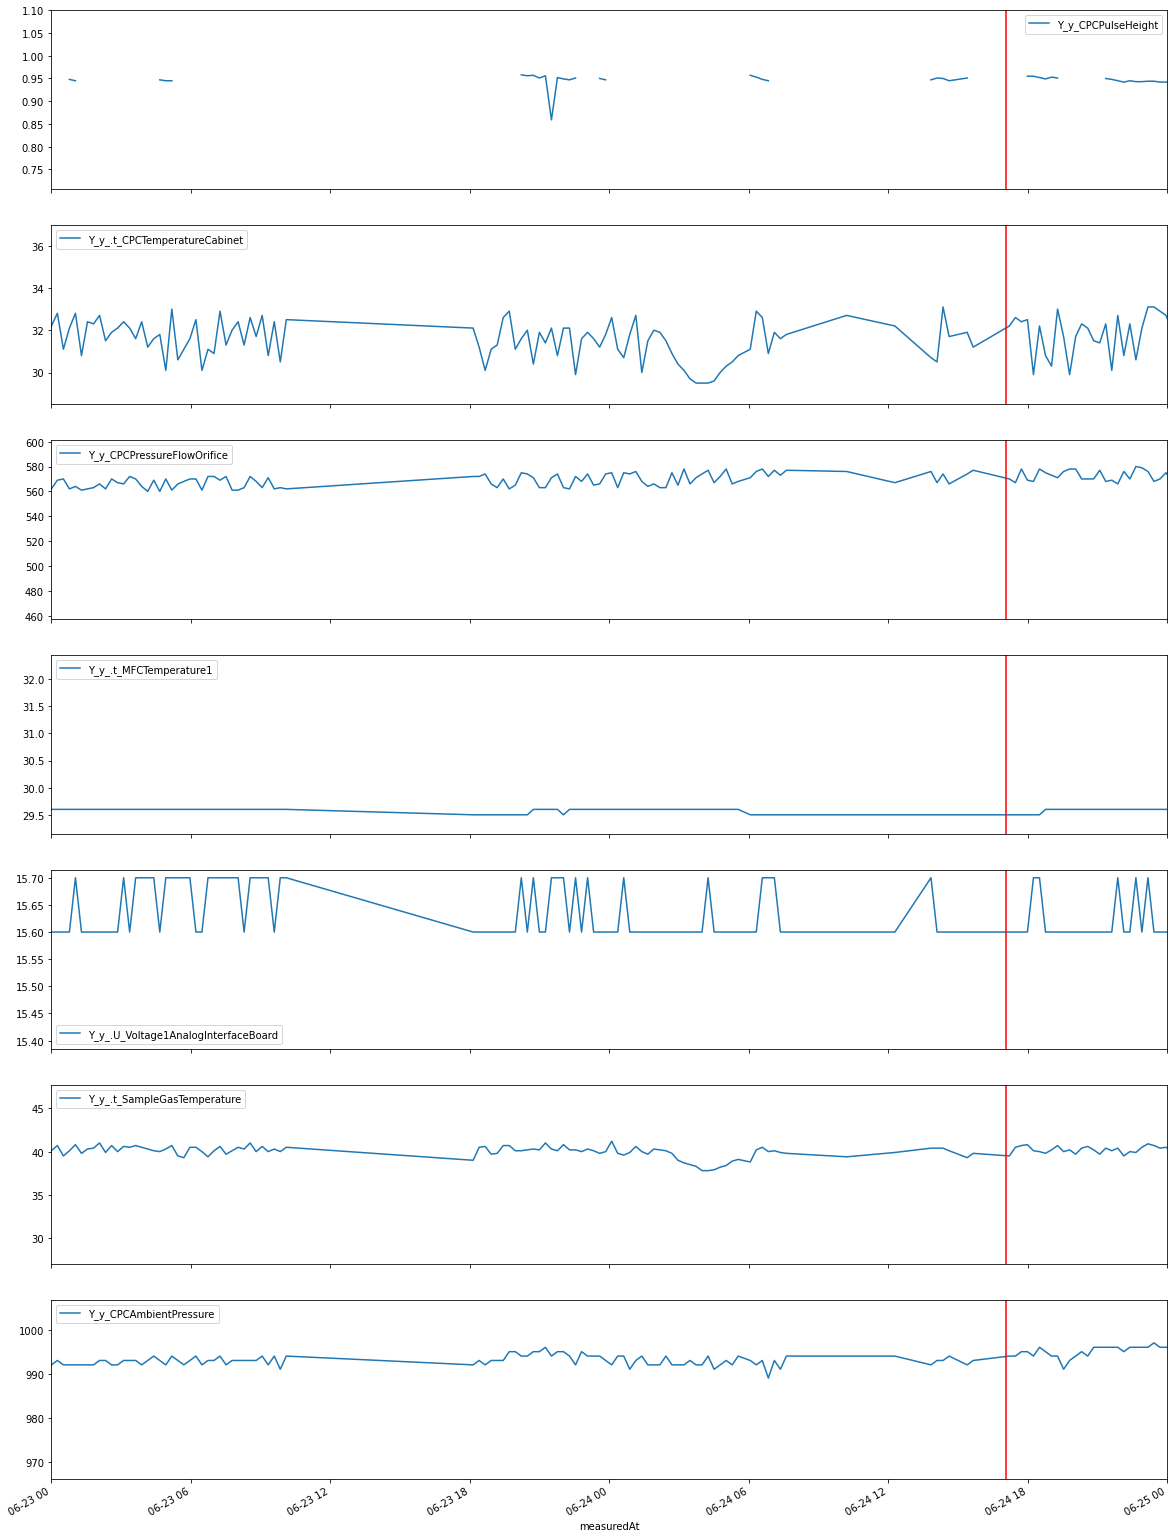

In [28]:
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(20,30), sharex=True)
pp2=final_data_required.plot('measuredAt','Y_y_CPCPulseHeight',ax=axes[0],kind='line')
pp4=final_data_required.plot('measuredAt','Y_y_.t_CPCTemperatureCabinet',ax=axes[1],kind='line')
pp6=final_data_required.plot('measuredAt','Y_y_CPCPressureFlowOrifice',ax=axes[2],kind='line')
pp=final_data_required.plot('measuredAt','Y_y_.t_MFCTemperature1',ax=axes[3],kind='line')
pp3=final_data_required.plot('measuredAt','Y_y_.U_Voltage1AnalogInterfaceBoard',ax=axes[4],kind='line')
pp5=final_data_required.plot('measuredAt','Y_y_.t_SampleGasTemperature',ax=axes[5],kind='line')
pp7=final_data_required.plot('measuredAt','Y_y_CPCAmbientPressure',ax=axes[6],kind='line')
pp.axvline(l2[0], c='r') 
pp2.axvline(pd.to_datetime(l2[0]), c='r') 
pp3.axvline(pd.to_datetime(l2[0]), c='r') 
pp4.axvline(pd.to_datetime(l2[0]), c='r') 
pp5.axvline(pd.to_datetime(l2[0]), c='r') 
pp6.axvline(pd.to_datetime(l2[0]), c='r') 
pp7.axvline(pd.to_datetime(l2[0]), c='r') 
plt.xlim([pd.to_datetime('2020-06-23'), pd.to_datetime('2020-06-25')])
# for i in l1:
#     pp.axvline(pd.to_datetime(i), c='r')
#     pp2.axvline(pd.to_datetime(i), c='r')
plt.show()


### Error Code: 20010

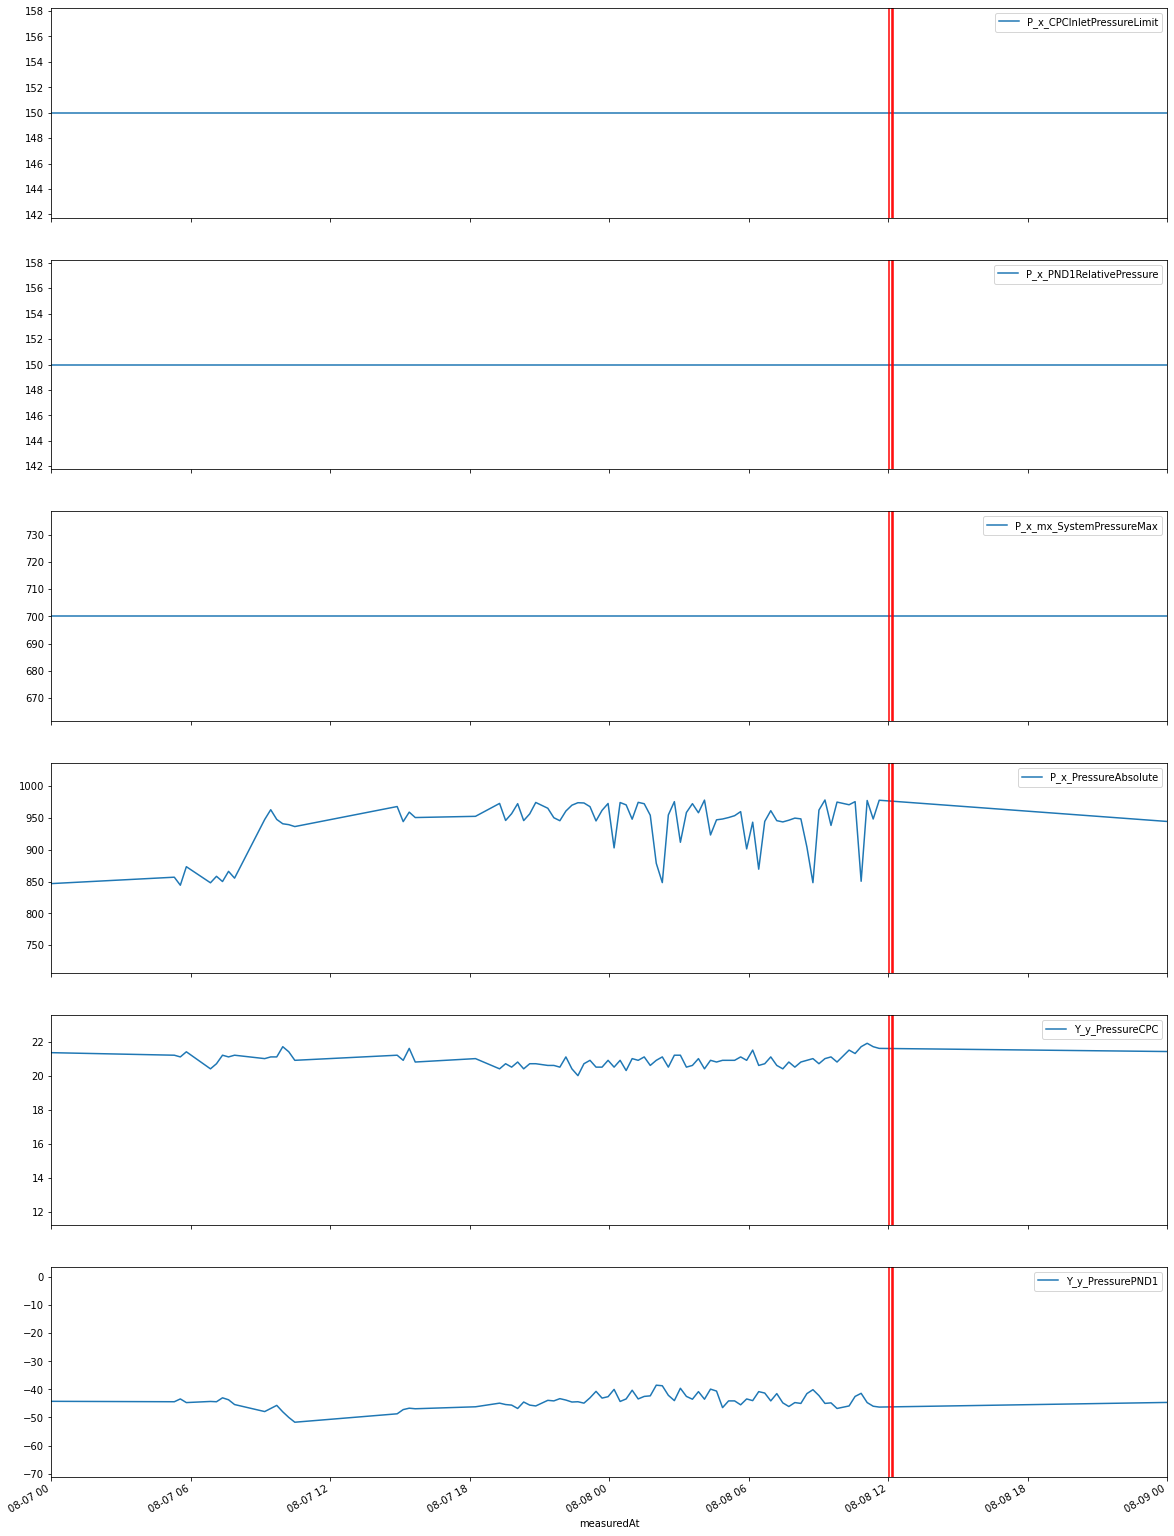

In [34]:
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(20,30), sharex=True)
pp2=final_data_required.plot('measuredAt','P_x_CPCInletPressureLimit',ax=axes[0],kind='line')
pp4=final_data_required.plot('measuredAt','P_x_PND1RelativePressure',ax=axes[1],kind='line')
pp=final_data_required.plot('measuredAt','P_x_PressureAbsolute',ax=axes[3],kind='line')
pp6=final_data_required.plot('measuredAt','P_x_mx_SystemPressureMax',ax=axes[2],kind='line')
pp3=final_data_required.plot('measuredAt','Y_y_PressureCPC',ax=axes[4],kind='line')
pp5=final_data_required.plot('measuredAt','Y_y_PressurePND1',ax=axes[5],kind='line')
for i in l3:
    pp.axvline(i, c='r') 
    pp2.axvline(pd.to_datetime(i), c='r') 
    pp3.axvline(pd.to_datetime(i), c='r') 
    pp4.axvline(pd.to_datetime(i), c='r') 
    pp5.axvline(pd.to_datetime(i), c='r') 
    pp6.axvline(pd.to_datetime(i), c='r') 

plt.xlim([pd.to_datetime('2020-08-07'), pd.to_datetime('2020-08-09')])
# for i in l1:
#     pp.axvline(pd.to_datetime(i), c='r')
#     pp2.axvline(pd.to_datetime(i), c='r')
plt.show()


### Error Code: 21050

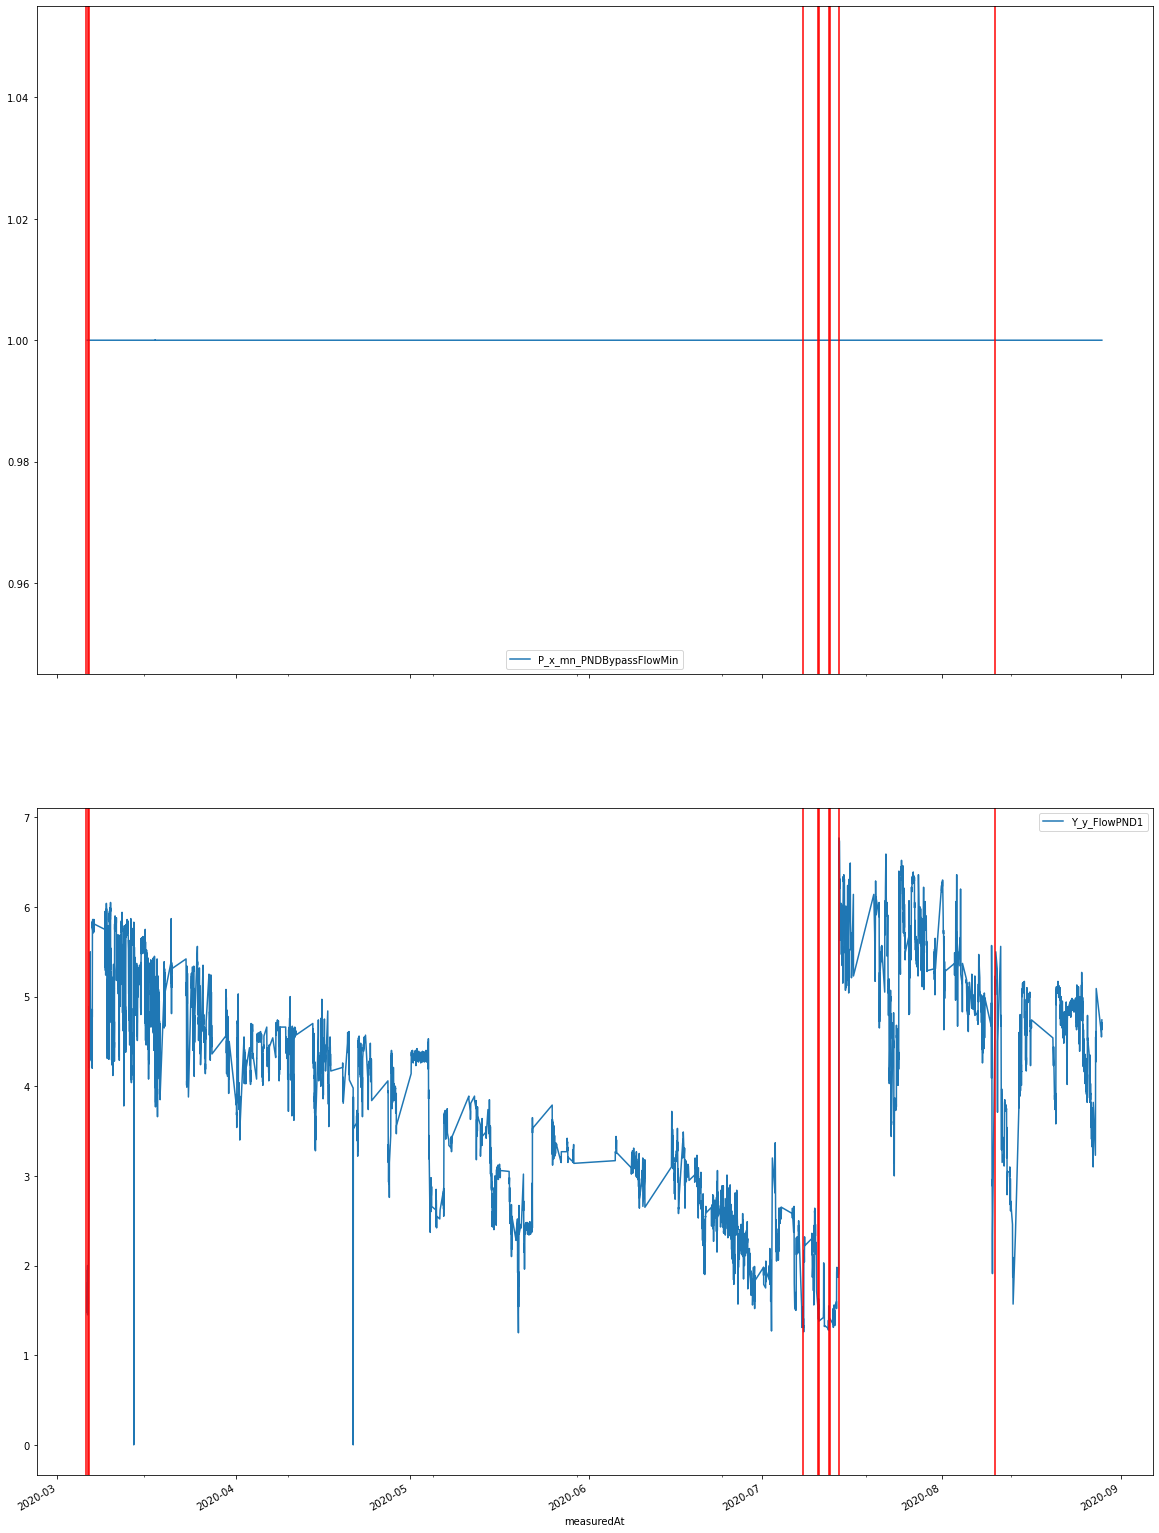

In [35]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20,30), sharex=True)
pp1=final_data_required.plot('measuredAt','Y_y_FlowPND1',ax=axes[1],kind='line')
pp2=final_data_required.plot('measuredAt','P_x_mn_PNDBypassFlowMin',ax=axes[0],kind='line')
#pp3=final_data_required.plot('measuredAt','Z_y_Status',ax=axes[2],kind='line')


for i in l4:
    pp1.axvline(i, c='r') 
    pp2.axvline(pd.to_datetime(i), c='r') 
    #pp3.axvline(pd.to_datetime(i), c='r') 

#plt.xlim([pd.to_datetime('2020-08-07'), pd.to_datetime('2020-08-09')])
# for i in l1:
#     pp.axvline(pd.to_datetime(i), c='r')
#     pp2.axvline(pd.to_datetime(i), c='r')
plt.show()


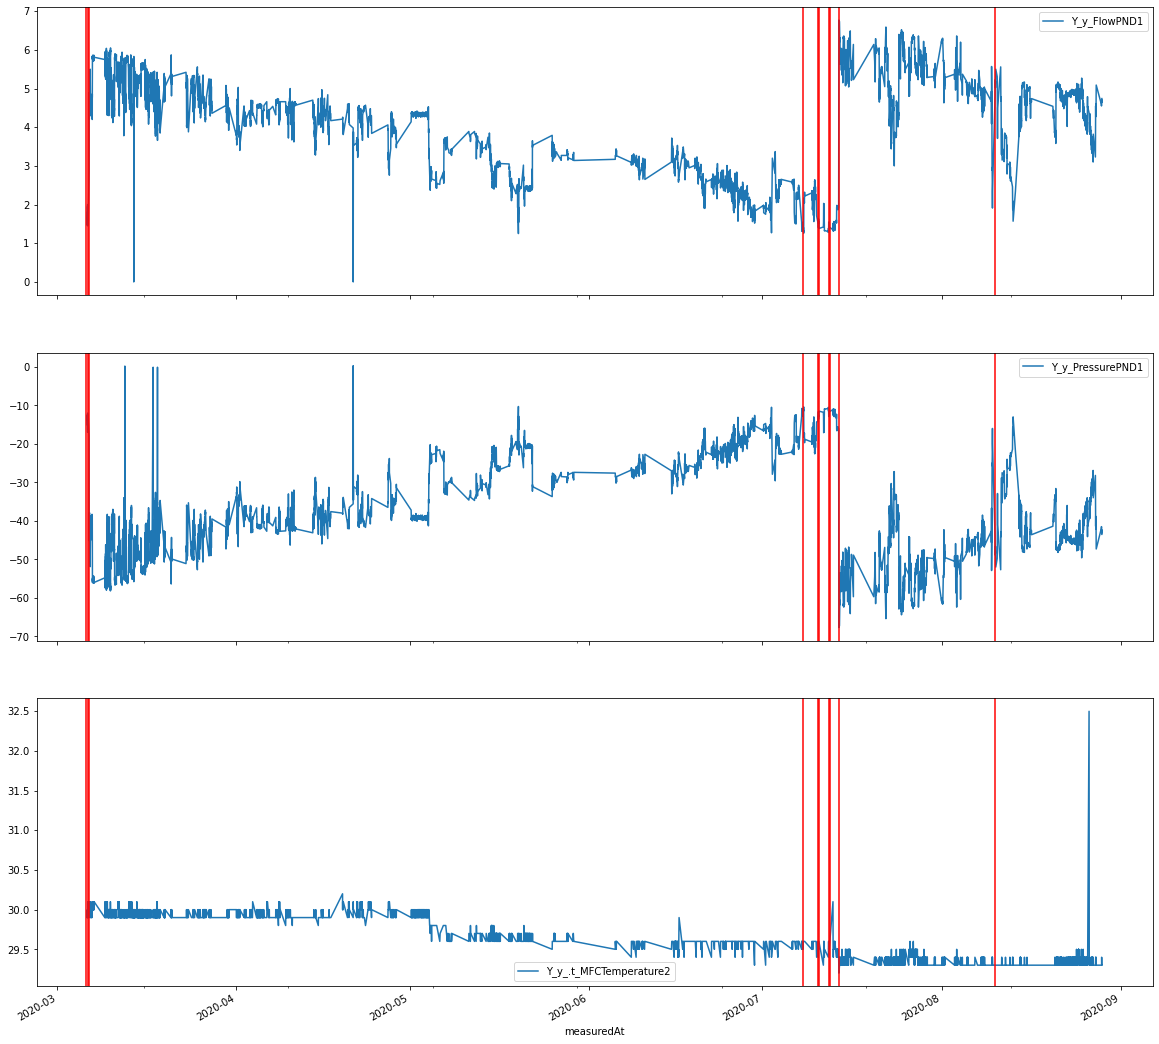

In [36]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20,20), sharex=True)
pp1=final_data_required.plot('measuredAt','Y_y_FlowPND1',ax=axes[0],kind='line')
#pp3=final_data_required.plot('measuredAt','Y_y_MasterCalibrationDRStep3_GAS',ax=axes[2],kind='line')
pp2=final_data_required.plot('measuredAt','Y_y_PressurePND1',ax=axes[1],kind='line')
pp4=final_data_required.plot('measuredAt','Y_y_.t_MFCTemperature2',ax=axes[2],kind='line')


for i in l4:
    pp1.axvline(i, c='r') 
    pp2.axvline(pd.to_datetime(i), c='r') 
    #pp3.axvline(pd.to_datetime(i), c='r') 
    pp4.axvline(pd.to_datetime(i), c='r') 
    #pp3.axvline(pd.to_datetime(i), c='r') 

#plt.xlim([pd.to_datetime('2020-08-07'), pd.to_datetime('2020-08-09')])
# for i in l1:
#     pp.axvline(pd.to_datetime(i), c='r')
#     pp2.axvline(pd.to_datetime(i), c='r')
plt.show()


In [37]:
error_11040['measuredAt']=pd.to_datetime(error_11040['measuredAt'])
error_11040.sort_values('measuredAt',inplace=True)
l1=list(error_11040[error_11040['errors'] == '11040']['measuredAt'])
error_11040['Date'] = pd.to_datetime(error_11040['measuredAt']).dt.date

c:\users\u22v09\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\users\u22v09\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\users\u22v09\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [82]:
error_1751400.head()

,Unnamed: 0,measuredAt,lastCalibrationDate,equipmentNumber,P_x_.Hou_OperatingCPCPump,P_x_.Hou_OperatingLastService,P_x_.Hou_OperatingRD,P_x_.Hou_OperatingRDPump,P_x_.Hou_OperatingTotal,P_x_.t_TemperaturePND1Set,...,Y_y_PressurePND1,Y_y_RDDiskFrequency,Z_y_Error,Z_y_Status,Z_y_TransitionStatus,Date,year,month,day,errors
0,0,2020-04-24T00:30:28.626Z,1900-01-01T00:00:00Z,1751400,1814.0,1321.0,1351.0,30.0,4324.0,155.0,...,-38.4,0.83,10012,2.0,R,2020-04-24,2020,4,24,10012
1,1,2020-04-24T00:53:28.626Z,1900-01-01T00:00:00Z,1751400,1815.0,1322.0,1352.0,30.0,4325.0,155.0,...,-38.3,0.83,10012,2.0,R,2020-04-24,2020,4,24,10012
2,2,2020-04-24T00:56:13.626Z,1900-01-01T00:00:00Z,1751400,1815.0,1322.0,1352.0,30.0,4325.0,155.0,...,-38.4,0.83,10012,2.0,R,2020-04-24,2020,4,24,10012
3,3,2020-04-24T01:30:38.624Z,1900-01-01T00:00:00Z,1751400,1815.0,1322.0,1352.0,30.0,4325.0,155.0,...,-38.7,0.83,10012,2.0,R,2020-04-24,2020,4,24,10012
4,4,2020-04-24T01:44:18.627Z,1900-01-01T00:00:00Z,1751400,1815.0,1322.0,1352.0,30.0,4326.0,155.0,...,-38.6,0.83,10012,2.0,R,2020-04-24,2020,4,24,10012


In [86]:
error_1751400 = pd.read_csv(r"D:\Device_anomaly_new\1751400_error.csv")

In [87]:
error_1751400['measuredAt'] = pd.to_datetime(error_1751400['measuredAt'])
error_1751400.sort_values('measuredAt',inplace=True)   ####

In [96]:
error_1751400['diff']=error_1751400['measuredAt'].diff().dt.total_seconds()

In [100]:
error_1751400['diff'].median()

4.997

In [60]:
error_1751400['diff']

0                               NaT
1                   0 days 00:23:00
2                   0 days 00:02:45
3            0 days 00:34:24.998000
4            0 days 00:13:40.003000
                     ...           
1226497    -1 days +23:41:54.998000
1226498      0 days 00:06:35.002000
1226499             0 days 00:10:35
1226500   -46 days +06:22:09.746000
1226501             0 days 00:00:00
Name: diff, Length: 1226502, dtype: timedelta64[ns]

In [61]:

data_1751400=final_data_required.merge(error_1751400, on = 'measuredAt',how='outer')

In [62]:
data_1751400

,P_x_.t_TemperatureElectronicBoardSet,P_x_.t_TemperaturePND1Set_x,P_x_.t_TemperatureSampleLineSet_x,P_x_.t_TemperatureTECSet,P_x_.t_TemperatureVPRSet_x,P_x_ActualPCRF1_MFR,P_x_ActualPCRF2_MFR,P_x_ActualPCRF3_MFR,P_x_ActualPCRF4_MFR,P_x_ActualPCRF5_MFR,...,Y_y_PressurePND1_y,Y_y_RDDiskFrequency_y,Z_y_Error,Z_y_Status,Z_y_TransitionStatus,Date,year,month,day,errors
0,35.0,155.0,150.0,30.0,350.0,1.02,1.02,1.01,1.02,1.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,35.0,155.0,150.0,30.0,350.0,1.02,1.02,1.01,1.02,1.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,35.0,155.0,150.0,30.0,350.0,1.02,1.02,1.01,1.02,1.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,35.0,155.0,150.0,30.0,350.0,1.02,1.02,1.01,1.02,1.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,35.0,155.0,150.0,30.0,350.0,1.02,1.02,1.01,1.02,1.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-38.0,0.82,10012,2.0,R,2020-04-21,2020.0,4.0,21.0,10012.0
1255530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-35.8,0.79,10012,2.0,R,2020-04-21,2020.0,4.0,21.0,10012.0
1255531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-33.5,0.80,10012,2.0,R,2020-04-21,2020.0,4.0,21.0,10012.0
1255532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.1,0.79,21050|00084,2.0,R,2020-03-06,2020.0,3.0,6.0,21050.0


In [41]:
df_filter_1751400 = data_1751400[['measuredAt','Y_y_FlowPND1_x','Y_y_FlowPND1_y','errors','Date']] 

In [42]:
df_filter_1751400

,measuredAt,Y_y_FlowPND1_x,Y_y_FlowPND1_y,errors,Date
0,2020-04-01 00:07:06.365000+00:00,3.79,NaN,NaN,NaN
1,2020-04-01 00:22:39.505000+00:00,3.91,NaN,NaN,NaN
2,2020-04-01 00:38:12.956000+00:00,3.88,NaN,NaN,NaN
3,2020-04-01 00:53:45.478000+00:00,3.77,NaN,NaN,NaN
4,2020-04-01 01:09:18.963000+00:00,3.68,NaN,NaN,NaN
...,...,...,...,...,...
1255529,2020-04-21 05:08:31.038000+00:00,NaN,4.21,10012.0,2020-04-21
1255530,2020-04-21 05:15:06.040000+00:00,NaN,4.00,10012.0,2020-04-21
1255531,2020-04-21 05:25:41.040000+00:00,NaN,3.77,10012.0,2020-04-21
1255532,2020-03-06 11:47:50.786000+00:00,NaN,0.00,21050.0,2020-03-06


In [43]:
df_filter_1751400.sort_values('measuredAt',inplace=True)

c:\users\u22v09\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [44]:
df_filter_1751400.set_index('measuredAt',inplace=True)

In [45]:
df_filter_1751400.reset_index(inplace=True)

In [46]:
df_filter_1751400

,measuredAt,Y_y_FlowPND1_x,Y_y_FlowPND1_y,errors,Date
0,2020-03-06 01:07:53.769000+00:00,NaN,0.00,84.0,2020-03-06
1,2020-03-06 01:07:53.769000+00:00,NaN,0.00,21050.0,2020-03-06
2,2020-03-06 05:32:27.785000+00:00,1.48,NaN,NaN,NaN
3,2020-03-06 05:32:29.982000+00:00,1.51,NaN,NaN,NaN
4,2020-03-06 05:32:31.633000+00:00,1.51,NaN,NaN,NaN
...,...,...,...,...,...
1255529,2020-09-04 15:30:02.316000+00:00,NaN,3.38,11040.0,2020-09-04
1255530,2020-09-04 15:30:07.316000+00:00,NaN,3.37,10012.0,2020-09-04
1255531,2020-09-04 15:30:07.316000+00:00,NaN,3.37,11040.0,2020-09-04
1255532,2020-09-04 15:30:12.317000+00:00,NaN,3.38,10012.0,2020-09-04


In [47]:
# #graph 
# plt.figure(figsize=(15,9))
# plt.plot('measuredAt','Y_y_FlowPND1_x', data = df_filter_1751400[['measuredAt','Y_y_FlowPND1_x']],color ='blue',label='Y_y_RelPressure_fing')
# plt.plot('measuredAt','Y_y_FlowPND1_y', data = df_filter_1751400, color ='Green',label='Y_y_RelPressure_error')
# #plt.plot('Index','flag', data = df_filter_2020_17_06_, color ='red',label='flag_20042')
# plt.legend(loc=1)
# plt.xlabel('measuredAt',fontsize=15)
# plt.ylabel('Y_y_FlowPND1',fontsize=15)
# #plt.title("day-wise StdDev of channel: Y_y_AbsPressure")

# for i in l4:
#     plt.axvline(pd.to_datetime(i), c='r')
# plt.xticks()
# plt.grid()
# plt.show() 

In [48]:
# fig, axes = plt.subplots(nrows=2, sharex=True)
# axes[0].plot(df_filter_1751400['Y_y_FlowPND1_x'], color='blue')
# axes[1].plot(df_filter_1751400['Y_y_FlowPND1_y'], color='blue')

# axes[0].set(ylabel='Original Data')
# axes[1].set(ylabel='Filled Data')

# plt.show() 

In [49]:
# fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16,10), sharex=True)
# pp=df_filter_1751400[['measuredAt','Y_y_FlowPND1_x']].plot('measuredAt','Y_y_FlowPND1_x',ax=axes[0],kind='line',color='blue')
# for i in l4:
#     pp.axvline(pd.to_datetime(i), c='r')
# pp2=df_filter_1751400.plot('measuredAt','Y_y_FlowPND1_y',ax=axes[1],kind='line')
# for i in l4:
#     pp2.axvline(pd.to_datetime(i), c='r')    
  
# plt.show()

In [50]:
# fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16,10), sharex=True)
# pp=final_data_required[['measuredAt','Y_y_FlowPND1']].plot('measuredAt','Y_y_FlowPND1',ax=axes[0],kind='line',color='blue')
# pp2=error_1751400.plot('measuredAt','Y_y_FlowPND1',ax=axes[1],kind='line')
# for i in l4:
#     pp.axvline(pd.to_datetime(i), c='r')
#     pp2.axvline(pd.to_datetime(i), c='r') 
    
# plt.show()

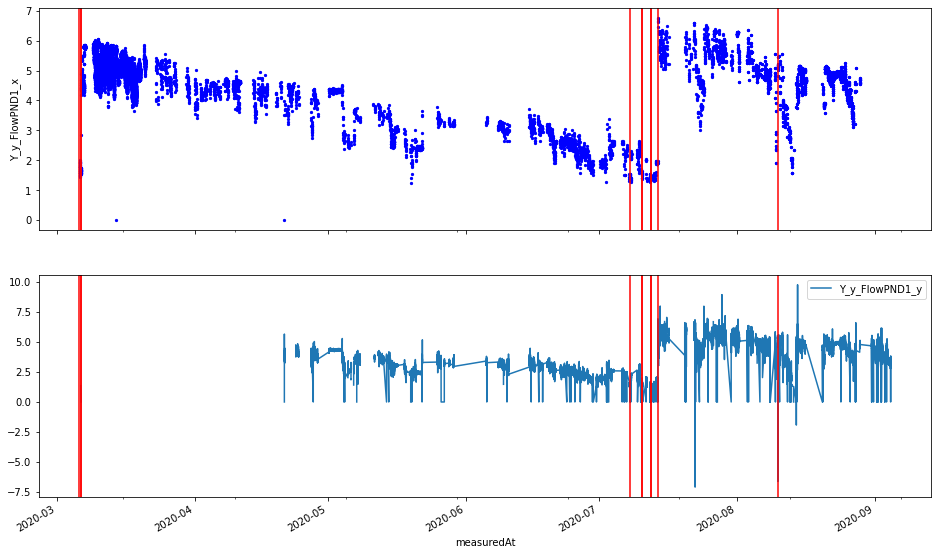

In [51]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16,10), sharex=True)
pp=df_filter_1751400[['measuredAt','Y_y_FlowPND1_x']].plot('measuredAt','Y_y_FlowPND1_x',ax=axes[0],kind='scatter',color='blue',s=5)
pp2=df_filter_1751400.plot('measuredAt','Y_y_FlowPND1_y',ax=axes[1],kind='line')
for i in l4:
    pp.axvline(pd.to_datetime(i), c='r')
    pp2.axvline(pd.to_datetime(i), c='r')      
plt.show()

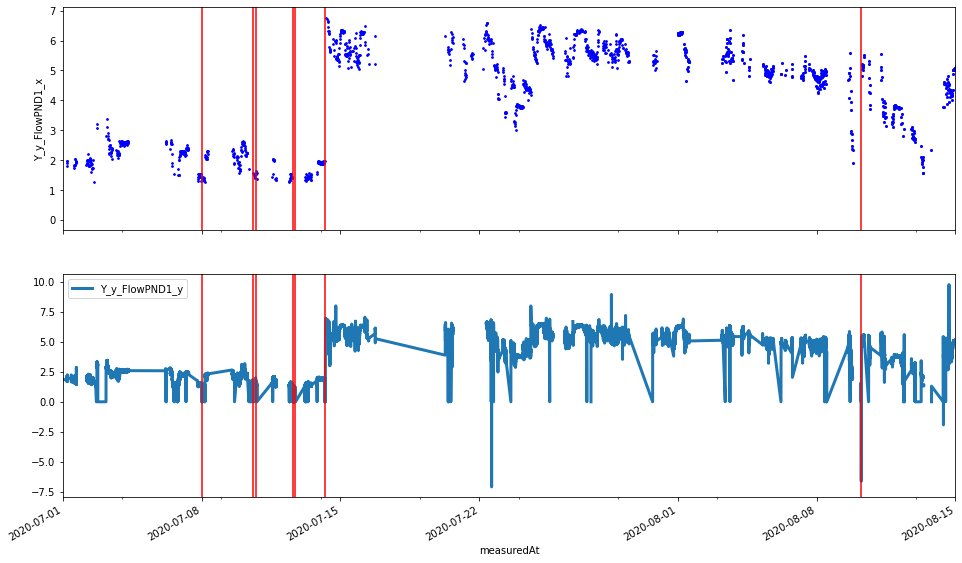

In [52]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16,10), sharex=True)
pp=df_filter_1751400[['measuredAt','Y_y_FlowPND1_x']].plot('measuredAt','Y_y_FlowPND1_x',ax=axes[0],kind='scatter',color='blue',s=3)
pp2=df_filter_1751400.plot('measuredAt','Y_y_FlowPND1_y',ax=axes[1],kind='line',lw=3)
for i in l4:
    pp.axvline(pd.to_datetime(i), c='r')
    pp2.axvline(pd.to_datetime(i), c='r')  
plt.xlim([pd.to_datetime('2020-07-01'), pd.to_datetime('2020-08-15')])
plt.show()

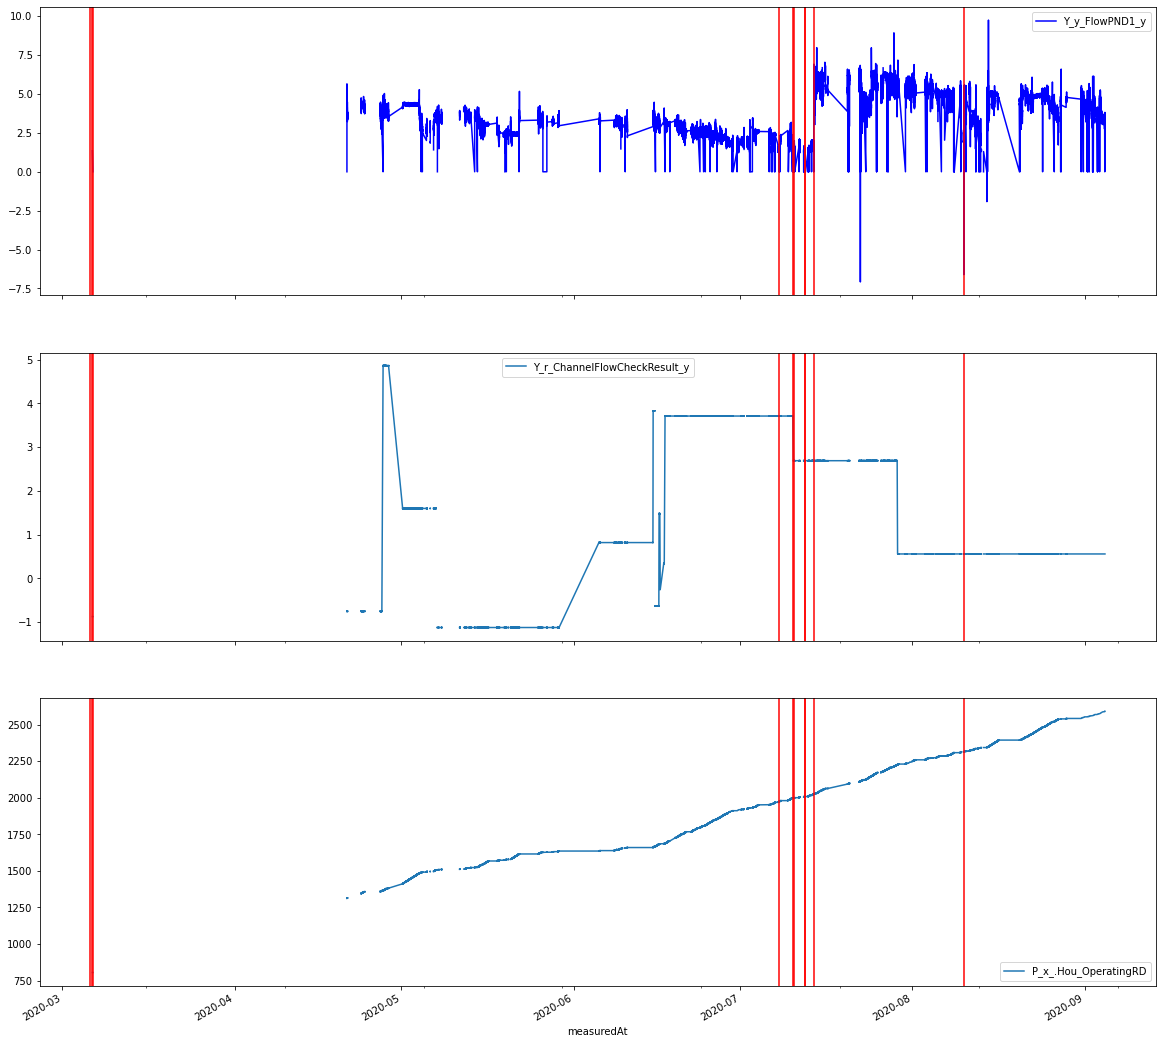

In [77]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20,20), sharex=True)
pp=data_1751400.plot('measuredAt','Y_y_FlowPND1_y',ax=axes[0],kind='line',color='blue')
pp2=data_1751400.plot('measuredAt','P_x_.Hou_OperatingRD',ax=axes[2],kind='line')
pp3=data_1751400.plot('measuredAt','Y_r_ChannelFlowCheckResult_y',ax=axes[1],kind='line')
for i in l4:
    pp.axvline(pd.to_datetime(i), c='r')
    pp2.axvline(pd.to_datetime(i), c='r')     
    pp3.axvline(pd.to_datetime(i), c='r') 
plt.show()

In [76]:
error_1751400['Y_r_ChannelFlowCheckResult_y'].unique()

array([  nan, -0.75,  4.86,  1.6 , -1.12,  0.82,  3.83, -0.63,  1.48,
        3.71,  2.69,  0.56,  0.34, -0.25, -0.87])

In [53]:
# plt.figure(figsize=(15,9))
# plt.plot('measuredAt','Y_y_FlowPND1_x', '-r*',data = df_filter_1751400,color ='blue',label='Y_y_FlowPND1_fing')
# plt.plot('measuredAt','Y_y_FlowPND1_y', data = df_filter_1751400, color ='Green',label='Y_y_FlowPND1_error')
# #plt.plot('Index','flag', data = df_filter_2020_17_06_, color ='red',label='flag_20042')
# plt.legend(loc=1)
# plt.xlabel('measuredAt',fontsize=15)
# plt.ylabel('Y_y_FlowPND1',fontsize=15)
# #plt.title("day-wise StdDev of channel: Y_y_AbsPressure")

# for i in l4:
#     plt.axvline(i, c='r')
# plt.xticks()
# plt.grid()
# plt.show() 

In [ ]:
l=out_of_range_df_1333446.groupby(by=["Channel name","flag"])["value"].count()
l= pd.DataFrame(l)
l=l.reset_index(["Channel name","flag"])
l2 = l.pivot_table('value',['Channel name'],'flag')
pd.set_option('display.max_columns',None) 
pd.set_option('display.max_rows',None) 
l3 = l2.dropna(subset=[l2.columns[1]])
l3["Channel_outOfRange"] = l3.index
chn_outRange = list(l3["Channel_outOfRange"])
chn_outRange

In [ ]:
l3

In [ ]:
mss_fig_1333446.equipmentNumber.unique()

In [ ]:
APC_fig_1751400_OFR_channels = mss_fig_1333446[['equipmentNumber','measuredAt','date','P_x_DRStep1',
'P_x_DRStep2',
'P_x_DRStep3',
'P_x_PND1Speed',
'P_x_PressureAbsolute',
'Y_y_.t_CPCTemperatureCabinet',
'Y_y_AnalogInA',
'Y_y_AnalogInB',
'Y_y_CPCAmbientPressure',
'Y_y_CPCButanolLevel',
'Y_y_CPCConcentration',
'Y_y_CPCPressureFlowOrifice',
'Y_y_CPCPressureNozzle',
'Y_y_CPCPulseHeight',
'Y_y_FlowCPCBypass',
'Y_y_FlowPND1',
'Y_y_PND1',
'Y_y_RDDiskFrequency',
'Y_y_RefCPCAmbientPressure',
'Y_y_RefCPCButanolLevel',
'Y_y_RefCPCNozzlePressure',
'Y_y_RefCPCPressureFlowOrifice',
'Y_y_RefCPCTempCondenser',
'Y_y_RefCPCTempOptic',
'Y_y_RefCPCTempSaturator']]

In [ ]:
minnmax = APC_fig_1751400_OFR_channels.drop(['measuredAt'],axis=1).groupby('equipmentNumber').agg([np.min, np.max])

In [ ]:
APC_fig_1751400_OFR_channels.describe()

In [ ]:
minnmax

In [ ]:
# APC_fig_1751400_OFR_channels.drop(['measuredAt'],axis=1).agg([np.min, np.max])

In [ ]:
minnmax = minnmax.stack(0).reset_index(level=1)

In [ ]:
minnmax.columns

In [ ]:
mss_fig_1333446.boxplot(column=['P_x_DRStep1'], by=['equipmentNumber'], figsize = (20,10),rot=90)
plt.axhline(0, c='r') 
plt.axhline(2500, c='r') 

In [ ]:
mss_fig_1333446.boxplot(column=['P_x_DRStep2'], by=['equipmentNumber'], figsize = (20,10),rot=90)
plt.axhline(0, c='r') 
plt.axhline(2500, c='r') 

In [ ]:
mss_fig_1333446.boxplot(column=['P_x_DRStep3'], by=['equipmentNumber'], figsize = (20,10),rot=90)
plt.axhline(0, c='r') 
plt.axhline(2500, c='r') 

In [ ]:
mss_fig_1333446.boxplot(column=['Y_y_CPCPressureNozzle'], by=['equipmentNumber'], figsize = (20,10),rot=90)
plt.axhline(16, c='r') 
plt.axhline(38, c='r') 

In [ ]:
mss_fig_1333446.boxplot(column=['Y_y_CPCButanolLevel'], by=['equipmentNumber'], figsize = (20,10),rot=90)
plt.axhline(1750, c='r') 
plt.axhline(3500, c='r') 

In [ ]:
mss_fig_1333446.groupby('equipmentNumber').measuredAt.count()

In [ ]:
mss_fig_1333446.boxplot(column=['Y_y_CPCPulseHeight'], by=['equipmentNumber'], figsize = (20,10),rot=90)
plt.axhline(0.7, c='r') 
#plt.axhline(3500, c='r') 

### Correlation

In [35]:
#define cross corr
def Cross_Correlation(df = None, col1 = None, col2 = None ):
    sr1 = df[col1].values
    sr2 = df[col2].values
    sr1 = (sr1 - np.mean(sr1))/(np.std(sr1)*len(sr1))
    sr2 = (sr2 - np.mean(sr2)) / (np.std(sr2))
    Cross_Corr = np.correlate(sr1,sr2,mode = 'full')
    Cross_Corr_ = pd.DataFrame({'Lag' : range(-(len(sr2)-1),len(sr1)), 'Correlation' : Cross_Corr}) 
    return Cross_Corr_ 

In [36]:
mss_fig_1_equip = mss_fig_SMGA[mss_fig_SMGA.equipmentNumber == 1751400]
mss_fig_1_equip = mss_fig_1_equip.sort_values(by=['measuredAt'])
mss_fig_1_equip = mss_fig_1_equip.set_index('measuredAt')

In [37]:
# df1 = mss_fig_1_equip[['Y_y_CPCPressureNozzle','Y_y_CPCButanolLevel']]
# df1 = df1.dropna() 
# df1_CC = Cross_Correlation(df=df1,col1 = 'Y_y_CPCPressureNozzle',col2 = 'Y_y_CPCButanolLevel')  
# df1_CC['Correlation'].abs().max()

In [38]:
list(mss_fig_1_equip.dtypes)

[dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('O'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('O'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('f

In [39]:
df_float_only = mss_fig_1_equip.select_dtypes(exclude=['object','int64'])

In [52]:
knw_measu = pd.read_excel(r"D:\Device_anomaly_new\AVLAPC.xlsx",sheet_name = "not define")
channels_for_CC = list(df_float_only.columns)
knw_measu_chnl = list(knw_measu['Channel name'].unique())

In [42]:
channels_for_CC

342

In [48]:
bb=list(mss_fig_1_equip.columns)

In [53]:
len(list(set(bb) & set(knw_measu_chnl)))


2

In [41]:
len(knw_measu_chnl)

205

In [ ]:
df_CC_Y_y_FlowPND1 = pd.DataFrame()
for i in knw_measu_chnl:
    try:
        df1 = df_float_only[['Y_y_FlowPND1',i]]
        df1 = df1.dropna() 
        print(df1.head(2))
        df1_CC = Cross_Correlation(df=df1,col1 = 'Y_y_FlowPND1',col2 = i)  
        df1_CC = df1_CC[df1_CC['Correlation'].abs() == df1_CC['Correlation'].abs().max()]
        
        df1_CC['channel'] = i
        print(df1_CC)
        df_CC_Y_y_FlowPND1 = df_CC_Y_y_FlowPND1.append(df1_CC)
        
    except:
        pass

In [ ]:
df_CC_Y_y_FlowPND1['channel1'] = 'Y_y_FlowPND1'
df_CC_Y_y_FlowPND1.sort_values('Correlation')

In [57]:
error_channels_list = list(error_1751400.columns)[5:-5]

In [58]:
error_channels_list

['P_x_.Hou_OperatingLastService',
 'P_x_.Hou_OperatingRD',
 'P_x_.Hou_OperatingRDPump',
 'P_x_.Hou_OperatingTotal',
 'P_x_.t_TemperaturePND1Set',
 'P_x_.t_TemperatureSampleLineSet',
 'P_x_.t_TemperatureVPRSet',
 'P_x_CPCInletPressureLimit',
 'P_x_PND1RelativePressure',
 'P_x_PressureAbsolute',
 'P_x_RDHeatingSwitch',
 'P_x_VPRHeatingSwitch',
 'P_x_mn_PNDBypassFlowMin',
 'P_x_mx_SystemPressureMax',
 'Y_c_DeviceName',
 'Y_c_FirmwareVersion',
 'Y_r_ChannelFlowCheckResult',
 'Y_r_LeakCheckResult',
 'Y_r_ResponseCheckResult',
 'Y_y_.Hou_NextService',
 'Y_y_.U_Voltage1AnalogControllerBoard',
 'Y_y_.U_Voltage1AnalogInterfaceBoard',
 'Y_y_.U_Voltage1ControllerBoard',
 'Y_y_.U_Voltage2AnalogControllerBoard',
 'Y_y_.U_Voltage2AnalogInterfaceBoard',
 'Y_y_.U_Voltage2ControllerBoard',
 'Y_y_.U_VoltageElectronicPowerSupply',
 'Y_y_.U_VoltageHeatingRD',
 'Y_y_.U_VoltageHetingLine',
 'Y_y_.U_VoltageInterfaceBoard',
 'Y_y_.U_VoltageMainElectronic',
 'Y_y_.U_VoltagePump',
 'Y_y_.U_VoltageStepMotor',
 '

In [57]:
df_CC_Y_y_FlowPND1_error = pd.DataFrame()
for i in error_channels_list:
    try:
        df1 = error_1751400[['Y_y_FlowPND1',i]]
        df1 = df1.dropna() 
        print(df1.head(2))
        df1_CC = Cross_Correlation(df=df1,col1 = 'Y_y_FlowPND1',col2 = i)  
        df1_CC = df1_CC[df1_CC['Correlation'].abs() == df1_CC['Correlation'].abs().max()]
        
        df1_CC['channel'] = i
        print(df1_CC)
        df_CC_Y_y_FlowPND1_error = df_CC_Y_y_FlowPND1_error.append(df1_CC)
        
    except:
        pass

   Y_y_FlowPND1  P_x_.Hou_OperatingLastService
0          4.25                         1321.0
1          4.25                         1322.0
         Lag  Correlation                        channel
1226912  444    -0.586952  P_x_.Hou_OperatingLastService
   Y_y_FlowPND1  P_x_.Hou_OperatingRD
0          4.25                1351.0
1          4.25                1352.0
         Lag  Correlation               channel
1226944  444    -0.586981  P_x_.Hou_OperatingRD
   Y_y_FlowPND1  P_x_.Hou_OperatingRDPump
0          4.25                      30.0
1          4.25                      30.0


c:\users\u22v09\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning:

invalid value encountered in true_divide



Empty DataFrame
Columns: [Lag, Correlation, channel]
Index: []
   Y_y_FlowPND1  P_x_.Hou_OperatingTotal
0          4.25                   4324.0
1          4.25                   4325.0
         Lag  Correlation                  channel
1226948  448    -0.573776  P_x_.Hou_OperatingTotal
   Y_y_FlowPND1  P_x_.t_TemperaturePND1Set
0          4.25                      155.0
1          4.25                      155.0


c:\users\u22v09\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning:

invalid value encountered in true_divide



Empty DataFrame
Columns: [Lag, Correlation, channel]
Index: []
   Y_y_FlowPND1  P_x_.t_TemperatureSampleLineSet
0          4.25                            150.0
1          4.25                            150.0


c:\users\u22v09\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning:

invalid value encountered in true_divide



Empty DataFrame
Columns: [Lag, Correlation, channel]
Index: []
   Y_y_FlowPND1  P_x_.t_TemperatureVPRSet
0          4.25                     350.0
1          4.25                     350.0


c:\users\u22v09\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning:

invalid value encountered in true_divide



Empty DataFrame
Columns: [Lag, Correlation, channel]
Index: []
   Y_y_FlowPND1  P_x_CPCInletPressureLimit
0          4.25                      150.0
1          4.25                      150.0


c:\users\u22v09\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning:

invalid value encountered in true_divide



Empty DataFrame
Columns: [Lag, Correlation, channel]
Index: []
   Y_y_FlowPND1  P_x_PND1RelativePressure
0          4.25                     150.0
1          4.25                     150.0


c:\users\u22v09\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning:

invalid value encountered in true_divide



Empty DataFrame
Columns: [Lag, Correlation, channel]
Index: []
   Y_y_FlowPND1  P_x_PressureAbsolute
0          4.25                 949.4
1          4.25                 948.5
         Lag  Correlation               channel
1226503    2    -0.577878  P_x_PressureAbsolute
   Y_y_FlowPND1  P_x_RDHeatingSwitch
0          4.25                  1.0
1          4.25                  1.0


c:\users\u22v09\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning:

invalid value encountered in true_divide



Empty DataFrame
Columns: [Lag, Correlation, channel]
Index: []
   Y_y_FlowPND1  P_x_VPRHeatingSwitch
0          4.25                   1.0
1          4.25                   1.0


c:\users\u22v09\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning:

invalid value encountered in true_divide



Empty DataFrame
Columns: [Lag, Correlation, channel]
Index: []
   Y_y_FlowPND1  P_x_mn_PNDBypassFlowMin
0          4.25                      1.0
1          4.25                      1.0


c:\users\u22v09\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning:

invalid value encountered in true_divide



Empty DataFrame
Columns: [Lag, Correlation, channel]
Index: []
   Y_y_FlowPND1  P_x_mx_SystemPressureMax
0          4.25                     700.0
1          4.25                     700.0


c:\users\u22v09\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning:

invalid value encountered in true_divide



Empty DataFrame
Columns: [Lag, Correlation, channel]
Index: []
   Y_y_FlowPND1  Y_c_DeviceName
0          4.25             489
1          4.25             489


c:\users\u22v09\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning:

invalid value encountered in true_divide



Empty DataFrame
Columns: [Lag, Correlation, channel]
Index: []
   Y_y_FlowPND1 Y_c_FirmwareVersion
0          4.25               3.1.3
1          4.25               3.1.3
   Y_y_FlowPND1  Y_r_ChannelFlowCheckResult
0          4.25                       -0.75
1          4.25                       -0.75
         Lag  Correlation                     channel
1226390 -106    -0.609029  Y_r_ChannelFlowCheckResult
   Y_y_FlowPND1  Y_r_LeakCheckResult
0          4.25                  0.0
1          4.25                  0.0
         Lag  Correlation              channel
1226402  -94     0.648617  Y_r_LeakCheckResult
   Y_y_FlowPND1  Y_r_ResponseCheckResult
0          4.25                   319.76
1          4.25                   319.76
         Lag  Correlation                  channel
1226420  -76     0.529981  Y_r_ResponseCheckResult
   Y_y_FlowPND1  Y_y_.Hou_NextService
0          4.25                   0.0
1          4.25                   0.0
            Lag  Correlation               ch

c:\users\u22v09\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning:

invalid value encountered in true_divide



Empty DataFrame
Columns: [Lag, Correlation, channel]
Index: []
   Y_y_FlowPND1  Y_y_.t_SampleGasTemperature
0          4.25                         41.1
1          4.25                         41.5
         Lag  Correlation                      channel
1226995  494     0.347908  Y_y_.t_SampleGasTemperature
   Y_y_FlowPND1  Y_y_.t_TemperatureElectronicBoard
0          4.25                               50.6
1          4.25                               50.7
         Lag  Correlation                            channel
1226969  468     0.313103  Y_y_.t_TemperatureElectronicBoard
   Y_y_FlowPND1  Y_y_.t_TemperaturePND1
0          4.25                   154.7
1          4.25                   156.2
         Lag  Correlation                 channel
1226499   -2    -0.017936  Y_y_.t_TemperaturePND1
   Y_y_FlowPND1  Y_y_.t_TemperatureSampleLine
0          4.25                         149.3
1          4.25                         149.4
         Lag  Correlation                       channel
122

c:\users\u22v09\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning:

invalid value encountered in true_divide



Empty DataFrame
Columns: [Lag, Correlation, channel]
Index: []
   Y_y_FlowPND1  Y_y_FlowPND1
0          4.25          4.25
1          4.25          4.25
   Y_y_FlowPND1  Y_y_PressureCPC
0          4.25             22.0
1          4.25             21.2
         Lag  Correlation          channel
1226743  242    -0.145395  Y_y_PressureCPC
   Y_y_FlowPND1  Y_y_PressurePND1
0          4.25             -38.4
1          4.25             -38.3
         Lag  Correlation           channel
1226501    0    -0.998631  Y_y_PressurePND1
   Y_y_FlowPND1  Y_y_RDDiskFrequency
0          4.25                 0.83
1          4.25                 0.83
         Lag  Correlation              channel
1226501    0     0.507184  Y_y_RDDiskFrequency
   Y_y_FlowPND1 Z_y_Error
0          4.25     10012
1          4.25     10012
   Y_y_FlowPND1  Z_y_Status
0          4.25         2.0
1          4.25         2.0


c:\users\u22v09\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning:

invalid value encountered in true_divide



Empty DataFrame
Columns: [Lag, Correlation, channel]
Index: []
   Y_y_FlowPND1 Z_y_TransitionStatus
0          4.25                    R
1          4.25                    R


In [58]:
df_CC_Y_y_FlowPND1_error['channel1'] = 'Y_y_FlowPND1'
df_CC_Y_y_FlowPND1_error.sort_values('Correlation')

,Lag,Correlation,channel,channel1
1226501,0,-0.998631,Y_y_PressurePND1,Y_y_FlowPND1
1226390,-106,-0.609029,Y_r_ChannelFlowCheckResult,Y_y_FlowPND1
1226944,444,-0.586981,P_x_.Hou_OperatingRD,Y_y_FlowPND1
1226912,444,-0.586952,P_x_.Hou_OperatingLastService,Y_y_FlowPND1
1226503,2,-0.577878,P_x_PressureAbsolute,Y_y_FlowPND1
1226948,448,-0.573776,P_x_.Hou_OperatingTotal,Y_y_FlowPND1
1226490,-10,-0.330473,Y_y_CPCPressureNozzle,Y_y_FlowPND1
1226500,0,-0.314653,Y_y_CPCAmbientPressure,Y_y_FlowPND1
1226500,0,-0.306786,Y_y_.t_CPCTemperatureCabinet,Y_y_FlowPND1
1226743,242,-0.145395,Y_y_PressureCPC,Y_y_FlowPND1


In [59]:
yyflowpnd1 = df_CC_Y_y_FlowPND1_error.sort_values('Correlation')

In [60]:
yyflowpnd1.to_csv('yyflowpnd1.csv')

In [ ]:
# df_CC_Y_y_CPCPressureNozzle1 = pd.DataFrame()
# for i in knw_measu_chnl:
#     try:
#         df1 = df_float_only[['P_x_DRStep1',i]]
#         df1 = df1.dropna() 
#         print(df1.head(2))
#         df1_CC = Cross_Correlation(df=df1,col1 = 'P_x_DRStep1',col2 = i)  
#         df1_CC = df1_CC[df1_CC['Correlation'].abs() == df1_CC['Correlation'].abs().max()]
#         df1_CC['channel1'] = 'P_x_DRStep1'
#         df1_CC['channel'] = i
#         print(df1_CC)
#         df_CC_Y_y_CPCPressureNozzle1 = df_CC_Y_y_CPCPressureNozzle1.append(df1_CC)
        
#     except:
#         pass

    


In [ ]:
# df_CC_Y_y_CPCPressureNozzle1.sort_values('Correlation')

In [ ]:
# df_CC_Y_y_FlowPND1 = pd.DataFrame()
# for i in knw_measu_chnl:
#     try:
#         df1 = df_float_only[['Y_y_FlowPND1',i]]
#         df1 = df1.dropna() 
#         print(df1.head(2))
#         df1_CC = Cross_Correlation(df=df1,col1 = 'Y_y_FlowPND1',col2 = i)  
#         df1_CC = df1_CC[df1_CC['Correlation'].abs() == df1_CC['Correlation'].abs().max()]
#         df1_CC['channel2'] = i
#         df1_CC['channel1'] = 'Y_y_FlowPND1'
#         print(df1_CC)
#         df_CC_Y_y_FlowPND1 = df_CC_Y_y_FlowPND1.append(df1_CC)
        
#     except:
#         pass
    
# df_CC_Y_y_FlowPND1.reset_index(inplace=True)

In [ ]:
# df_CC_Y_y_FlowPND1.sort_values('Correlation')

In [ ]:
df_CC_Y_y_CPCPressureNozzle2 = pd.DataFrame()
for i in knw_measu_chnl:
    try:
        df1 = df_float_only[['Y_y_CPCPulseHeight',i]]
        df1 = df1.dropna() 
        print(df1.head(2))
        df1_CC = Cross_Correlation(df=df1,col1 = 'Y_y_CPCPulseHeight',col2 = i)  
        df1_CC = df1_CC[df1_CC['Correlation'].abs() == df1_CC['Correlation'].abs().max()]
        df1_CC['channel2'] = i
        df1_CC['channel1'] = 'Y_y_CPCPulseHeight'
        print(df1_CC)
        df_CC_Y_y_CPCPressureNozzle2 = df_CC_Y_y_CPCPressureNozzle2.append(df1_CC)
        
    except:
        pass
    
df_CC_Y_y_CPCPressureNozzle2.reset_index(inplace=True)

In [ ]:
df_CC_Y_y_CPCPressureNozzle2.sort_values('Correlation')

In [ ]:
df_CC_Y_y_t_CPCTemperatureCabinet = pd.DataFrame()
for i in knw_measu_chnl:
    try:
        df1 = df_float_only[['Y_y_.t_CPCTemperatureCabinet',i]]
        df1 = df1.dropna() 
        print(df1.head(2))
        df1_CC = Cross_Correlation(df=df1,col1 = 'Y_y_.t_CPCTemperatureCabinet',col2 = i)  
        df1_CC = df1_CC[df1_CC['Correlation'].abs() == df1_CC['Correlation'].abs().max()]
        df1_CC['Channel1'] = 'Y_y_.t_CPCTemperatureCabinet'
        df1_CC['Channel2'] = i       
        print(df1_CC)
        df_CC_Y_y_t_CPCTemperatureCabinet  = df_CC_Y_y_t_CPCTemperatureCabinet.append(df1_CC)
        
    except:
        pass
    
df_CC_Y_y_t_CPCTemperatureCabinet.reset_index(inplace=True)

In [ ]:
df_CC_Y_y_t_CPCTemperatureCabinet.sort_values('Correlation',ascending=False)

In [ ]:
df_CC_Y_y_CPCPressureFlowOrifice = pd.DataFrame()
for i in knw_measu_chnl:
    try:
        df1 = df_float_only[['Y_y_CPCPressureFlowOrifice',i]]
        df1 = df1.dropna() 
        print(df1.head(2))
        df1_CC = Cross_Correlation(df=df1,col1 = 'Y_y_CPCPressureFlowOrifice',col2 = i)  
        df1_CC = df1_CC[df1_CC['Correlation'].abs() == df1_CC['Correlation'].abs().max()]
        df1_CC['Channel1'] = 'Y_y_CPCPressureFlowOrifice'
        df1_CC['Channel2'] = i       
        print(df1_CC)
        df_CC_Y_y_CPCPressureFlowOrifice  = df_CC_Y_y_CPCPressureFlowOrifice.append(df1_CC)
        
    except:
        pass
    
df_CC_Y_y_CPCPressureFlowOrifice.reset_index(inplace=True)

In [ ]:
df_CC_Y_y_CPCPressureFlowOrifice.sort_values('Correlation',ascending=False)

In [ ]:
df2 = mss_fig_1_equip[['Y_y_CPCPressureFlowOrifice','Y_y_CPCAmbientPressure']]
df2 = df2.dropna() 
df2_CC = Cross_Correlation(df=df2,col1 = 'Y_y_CPCPressureFlowOrifice',col2 = 'Y_y_CPCAmbientPressure')  

In [ ]:
df2_CC['Channel1']='Y_y_CPCPressureFlowOrifice'
df2_CC['Channel2']='Y_y_CPCAmbientPressure'
df2_CC[df2_CC['Correlation'].abs()==df2_CC['Correlation'].abs().max()]

In [ ]:
df2_CC.sort_values('Lag')

In [ ]:
# cross_corr = pd.DataFrame(columns = ['chnl1','chnl2','lag', 'max_cross_corr', 'lag2','min_cross_corr'], index = list(range(0,len(knw_measu_chnl))))
# df_CC_Y_y_DiffPressure = pd.DataFrame()
# for i in range(0, len(knw_measu_chnl)):
#     cross_corr['chnl1'][i] = 'Y_y_mf_DILMFC'
#     cross_corr['chnl2'][i] = knw_measu_chnl[i]
#     try: 
#         df1 = mss_fig_1333446[['Y_y_DiffPressure',knw_measu_chnl[i]]]
#         df1 = df1.dropna()
#         df1 = df1.reset_index(drop=True)
#         df1_cc= Cross_Correlation(df = df1, col1 = 'Y_y_DiffPressure', col2 = knw_measu_chnl[i] )
#         df1_cc = df1_cc[df1_cc['Correlation'].abs() == df1_cc['Correlation'].abs().max()]
#         df1_cc["Channel1"] = "Y_y_DiffPressure"
#         df1_cc["Channel2"] = knw_measu_chnl[i] 
#         df_CC_Y_y_DiffPressure = df_CC_Y_y_DiffPressure.append(df1_cc)
#     except:
#         pass       

# column_names = ["Channel1","Channel2", "Lag","Correlation"]
# df_CC_Y_y_DiffPressure = df_CC_Y_y_DiffPressure.reindex(columns=column_names)

In [ ]:
# cross_corr = pd.DataFrame(columns = ['chnl1','chnl2','lag', 'max_cross_corr', 'lag2','min_cross_corr'], index = list(range(0,len(knw_measu_chnl))))

# for i in range(0, len(knw_measu_chnl)):
#     cross_corr['chnl1'][i] = 'Y_y_CPCPressureNozzle'
#     cross_corr['chnl2'][i] = knw_measu_chnl[i]
#     try: 
#         df1 = mss_fig_1333446[['Y_y_CPCPressureNozzle',knw_measu_chnl[i]]]
#         df1 = df1.dropna()
#         df1 = df1.reset_index(drop=True)
#         df1_cc= Cross_Correlation(df = df1, col1 = 'Y_y_CPCPressureNozzle', col2 = knw_measu_chnl[i] )
  
#         cross_corr['max_cross_corr'][i] = max(df1_cc['Correlation'])
#         cross_corr['lag'][i] = df1_cc.loc[df1_cc['Correlation'] == max(df1_cc['Correlation']), 'Lag'].iloc[0]
#         cross_corr['min_cross_corr'][i] = min(df1_cc['Correlation'])
#         cross_corr['lag2'][i] = df1_cc.loc[df1_cc['Correlation'] == min(df1_cc['Correlation']), 'Lag'].iloc[0]

#     except:
#         pass       


In [ ]:
#### DAYWISE

In [ ]:
out_of_range_df_daywise = pd.melt(mss_fig_1333446, id_vars =['date'], value_vars = chnl_list) 
out_of_range_df_daywise.rename(columns={'variable':'Channel name'},inplace=True)
out_of_range_df_daywise = out_of_range_df_daywise.merge(knw_measu, on = 'Channel name')
out_of_range_df_daywise['flag'] = None
out_of_range_df_daywise['flag'] = np.where((out_of_range_df_daywise['value'] < out_of_range_df_daywise[out_of_range_df_daywise.columns[5]]) | (out_of_range_df_daywise['value'] > out_of_range_df_daywise[out_of_range_df_daywise.columns[6]]),1,0)
out_of_range_df_daywise = out_of_range_df_daywise.dropna(subset=[out_of_range_df_daywise.columns[5], out_of_range_df_daywise.columns[6],'value']) 
out_of_range_df_daywise_P_x_ReserveCondUnit = out_of_range_df_daywise[out_of_range_df_daywise[out_of_range_df_daywise.columns[1]] == "Y_y_CPCConcentration"]                                                                      
out_of_range_df_daywise_P_x_ReserveCondUnit = out_of_range_df_daywise_P_x_ReserveCondUnit.reset_index(drop=True)
out_of_range_df_daywise_P_x_ReserveCondUnit=out_of_range_df_daywise_P_x_ReserveCondUnit.dropna(subset=['value'])

In [ ]:
fig, ax1 = plt.subplots(figsize=(30,20))
plt.grid(True) 
graph = sns.countplot(ax = ax1,x="date",hue="flag", data=out_of_range_df_daywise_P_x_ReserveCondUnit[out_of_range_df_daywise_P_x_ReserveCondUnit['flag'] == 0])
graph.set_xticklabels(graph.get_xticklabels(),rotation=90,fontsize=11)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylim(0, 300)
#plt.xlim(datetime.date(2020, 3, 1), datetime.date(2020, 4, 31))
i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 10,
        height,ha="center",rotation=90,fontsize=15)
    i += 1 

In [ ]:
out_of_range_df_daywise_Y_r_M_PeakConcDiluted = out_of_range_df_daywise[out_of_range_df_daywise[out_of_range_df_daywise.columns[1]] == "Y_y_CPCPressureNozzle"] 
out_of_range_df_daywise_Y_r_M_PeakConcDiluted = out_of_range_df_daywise_Y_r_M_PeakConcDiluted.reset_index(drop=True)
out_of_range_df_daywise_Y_r_M_PeakConcDiluted.head()
out_of_range_df_daywise_Y_r_M_PeakConcDiluted=out_of_range_df_daywise_Y_r_M_PeakConcDiluted.dropna(subset=['value'])
out_of_range_df_daywise_Y_r_M_PeakConcDiluted = out_of_range_df_daywise_Y_r_M_PeakConcDiluted.sort_values('date',ascending=True) 
fig, ax1 = plt.subplots(figsize=(30,20))
plt.grid(True) 
graph = sns.countplot(ax = ax1,x="date",hue="flag", data=out_of_range_df_daywise_Y_r_M_PeakConcDiluted,palette=[ "C1"])
graph.set_xticklabels(graph.get_xticklabels(),rotation=90,fontsize=11)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Date', fontsize=15)
i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 10,
        height,ha="center",rotation=90,fontsize=15)
    i += 1 